# Modeling and Simulation in Python

Chapter 7: Thermal systems

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


### Mixing liquids

We can figure out the final temperature of a mixture by setting the total heat flow to zero and then solving for $T$.

In [10]:
from sympy import *

init_printing() 

In [14]:
C1, C2, T1, T2, T = symbols('C1 C2 T1 T2 T')

eq = Eq(C1 * (T - T1) + C2 * (T - T2), 0)
eq

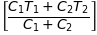

In [15]:
solve(eq, T)

### Analysis

We can use SymPy to solve the cooling differential equation.

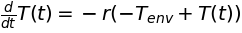

In [19]:
T_init, T_env, r, t = symbols('T_init T_env r t')
T = Function('T')

eqn = Eq(diff(T(t), t), -r * (T(t) - T_env))
eqn

In [20]:
solution_eq = dsolve(eqn)
solution_eq

In [21]:
general = solution_eq.rhs
general

We can use the initial condition to solve for $C_1$.  First we evaluate the general solution at $t=0$

In [22]:
at0 = general.subs(t, 0)
at0

Now we set $T(0) = T_{init}$ and solve for $C_1$

In [23]:
solutions = solve(Eq(at0, T_init), C1)
value_of_C1 = solutions[0]
value_of_C1

Then we plug the result into the general solution to get the particular solution:

In [24]:
particular = general.subs(C1, value_of_C1)
particular

We use a similar process to estimate $r$ based on the observation $T(t_{end}) = T_{end}$

In [25]:
t_end, T_end = symbols('t_end T_end')

Here's the particular solution evaluated at $t_{end}$

In [26]:
at_end = particular.subs(t, t_end)
at_end

Now we set $T(t_{end}) = T_{end}$ and solve for $r$

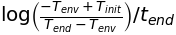

In [27]:
solutions = solve(Eq(at_end, T_end), r)
value_of_r = solutions[0]
value_of_r

We can use `evalf` to plug in numbers for the symbols.  The result is a SymPy float, which we have to convert to a Python float.

In [28]:
subs = dict(t_end=30, T_end=70, T_init=90, T_env=22)
r_coffee2 = value_of_r.evalf(subs=subs)
type(r_coffee2)

sympy.core.numbers.Float

In [14]:
r_coffee2 = float(r_coffee2)
r_coffee2